In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False
from tqdm import tqdm

In [2]:
energy = pd.read_csv('C:/Users/user/github/Data/energy/train.csv', encoding='cp949')

In [3]:
solar = pd.read_csv('C:\\Users\\user\\github\\Data\\capstone\\weather/solar_power_2204.csv')

In [4]:
solar['datetime'] = pd.to_datetime(solar['datetime'])
solar.target.replace(65535.0, solar.target.mean(), inplace=True)
solar['month'] = solar.datetime.dt.month
solar['hour'] = solar.datetime.dt.hour
solar['year'] = solar.datetime.dt.year
solar['day'] = solar.datetime.dt.day

solar_eda = solar.groupby(['year','month','day','hour']).mean().reset_index()
solar_eda[['year','month','day','hour']] = solar_eda[['year','month','day','hour']].astype('str')
solar_eda['date'] = (solar_eda.year + '-' + solar_eda.month + '-' + solar_eda.day + ' ' + solar_eda.hour + ':00')
solar_eda.date = pd.to_datetime(solar_eda.date)

In [5]:
solar_eda = solar_eda.set_index('date')
solar_eda = solar_eda.fillna(0)

In [6]:
ee = solar.groupby(['hour']).mean().target

In [7]:
ee[:7] = 0

In [8]:
ee[20:] = 0

In [9]:
ee = ee * 2.5

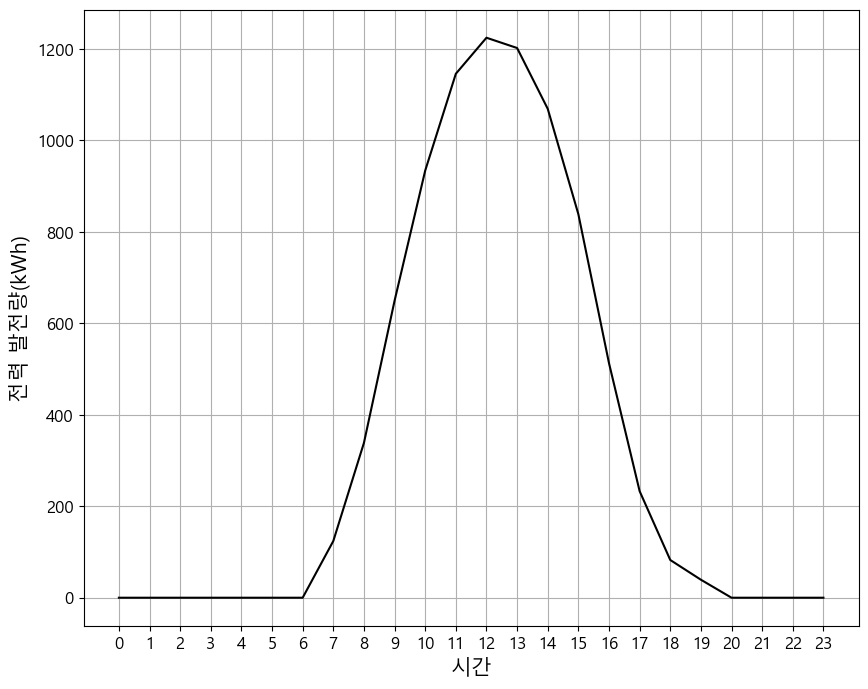

In [10]:
plt.figure(figsize=(10,8))
plt.plot(ee, color = 'k')
plt.grid(True)
plt.yticks(fontsize = 12)
plt.xticks(np.arange(0,24,1) , fontsize = 12)
plt.xlabel('시간', fontsize = 15)
plt.ylabel('전력 발전량(kWh)', fontsize = 15)
plt.show()

In [11]:
df = pd.read_csv('C:/Users/user/github/Data/energy/train.csv', encoding='cp949')

In [12]:
df.date_time = pd.to_datetime(df.date_time)

In [13]:
eda_df = df.copy()

eda_df['month'] = 0
eda_df['hour'] = 0
eda_df['year'] = 0
eda_df['day'] = 0
eda_df['요일'] = 0

In [14]:
days = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']

In [15]:
for i in tqdm(range(len(eda_df))):
    eda_df['month'][i] = eda_df.date_time[i].month
    eda_df['hour'][i] = eda_df.date_time[i].hour
    eda_df['year'][i] = eda_df.date_time[i].year
    eda_df['day'][i] = eda_df.date_time[i].day
    eda_df['요일'][i] = days[eda_df.date_time[i].weekday()]

100%|██████████| 122400/122400 [03:44<00:00, 544.22it/s]


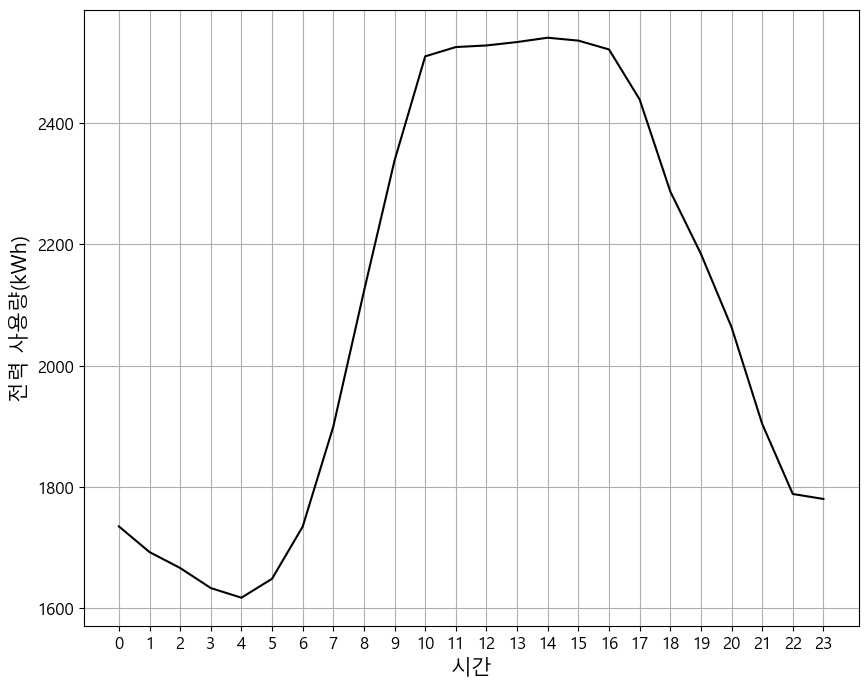

In [16]:
qq = eda_df[eda_df['태양광보유'] == 0].groupby(['hour']).mean()['전력사용량(kWh)']
plt.figure(figsize=(10,8))
plt.plot(qq, color = 'k')
plt.grid(True)
plt.yticks(fontsize = 12)
plt.xticks(np.arange(0,24,1) , fontsize = 12)
plt.xlabel('시간', fontsize = 15)
plt.ylabel('전력 사용량(kWh)', fontsize = 15)
plt.show()

In [17]:
time = [11, 13, 14, 15, 16, 17, 18, 19]

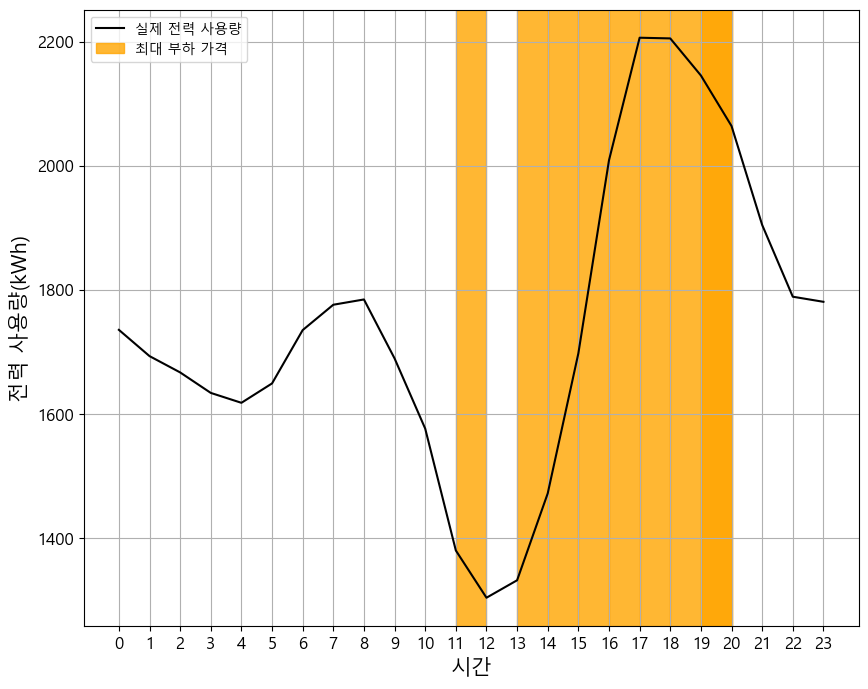

In [18]:
plt.figure(figsize=(10,8))
plt.plot(qq-ee, color = 'k', label = '실제 전력 사용량')
plt.grid(True)
plt.yticks(fontsize = 12)
plt.xticks(np.arange(0,24,1) , fontsize = 12)
plt.xlabel('시간', fontsize = 15)
plt.ylabel('전력 사용량(kWh)', fontsize = 15)
for i in time:
    plt.axvspan(i, i+1, alpha=0.8, color='orange')
    if i == time[-1]:
        plt.axvspan(i, i+1, alpha=0.8, color='orange', label = '최대 부하 가격')
plt.legend()
plt.show()

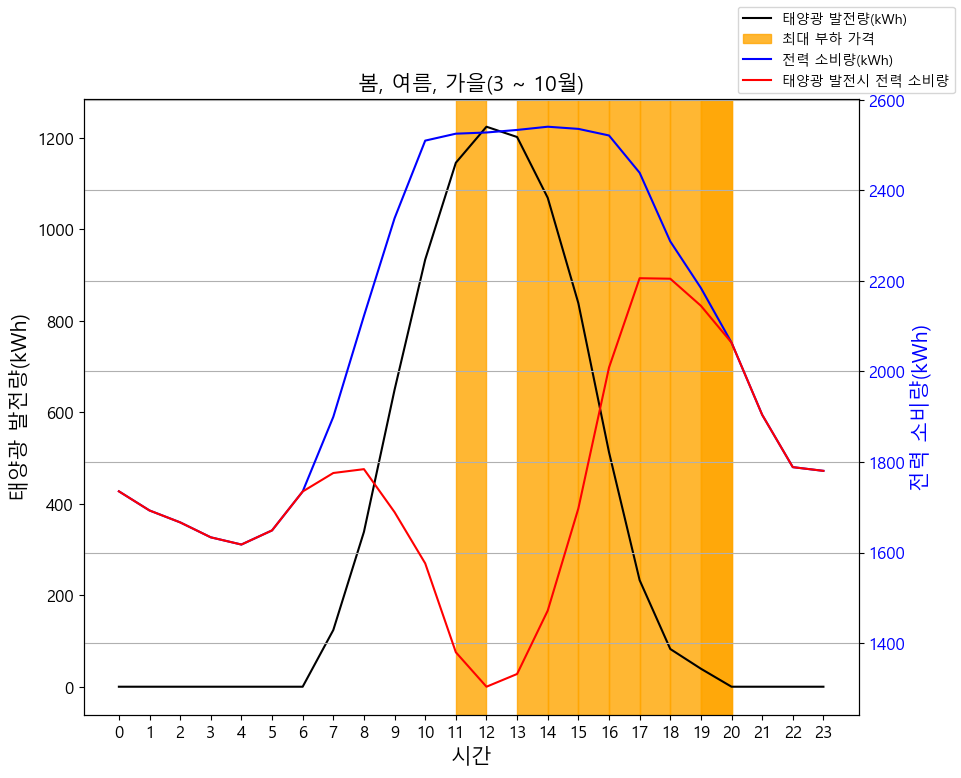

In [19]:
fig, ax1 = plt.subplots(figsize=(10, 8))

ax1.set_xlabel('시간', fontsize=15)
ax1.set_ylabel('태양광 발전량(kWh)', color='k', fontsize=15)
ax1.plot(ee, color='k', label='태양광 발전량(kWh)')
ax1.tick_params(axis='y', labelcolor='k', labelsize=12)
ax1.set_xticks(np.arange(0, 24, 1))
ax1.set_xticklabels(np.arange(0, 24, 1), fontsize=12)
ax1.set_title('봄, 여름, 가을(3 ~ 10월)', fontsize=15)

ax2 = ax1.twinx()

ax2.set_ylabel('전력 소비량(kWh)', color='b', fontsize=15)
ax2.plot(qq, color='b', label='전력 소비량(kWh)')
ax2.tick_params(axis='y', labelcolor='b', labelsize=12)

plt.plot(qq-ee, color='r', label='태양광 발전시 전력 소비량')


for i in time:
    ax1.axvspan(i, i+1, alpha=0.8, color='orange')
    if i == time[-1]:
        ax1.axvspan(i, i+1, alpha=0.8, color='orange', label = '최대 부하 가격')

plt.grid(True)
fig.legend()
plt.show()

In [20]:
time2 = [9, 10, 11, 16, 17, 18, 19]

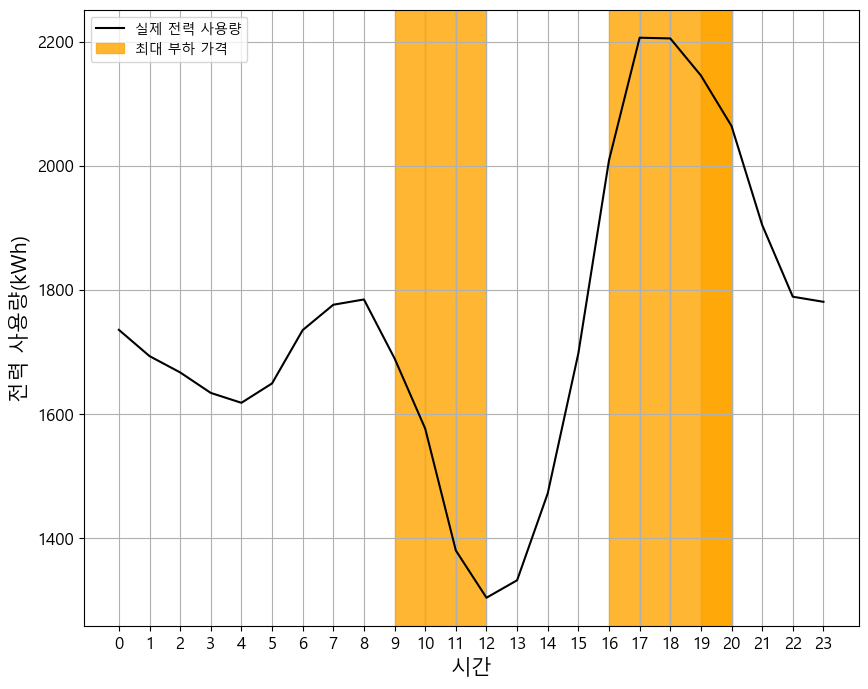

In [21]:
plt.figure(figsize=(10,8))
plt.plot(qq-ee, color = 'k', label = '실제 전력 사용량')
plt.grid(True)
plt.yticks(fontsize = 12)
plt.xticks(np.arange(0,24,1) , fontsize = 12)
plt.xlabel('시간', fontsize = 15)
plt.ylabel('전력 사용량(kWh)', fontsize = 15)
for i in time2:
    plt.axvspan(i, i+1, alpha=0.8, color='orange')
    if i == time2[-1]:
        plt.axvspan(i, i+1, alpha=0.8, color='orange', label = '최대 부하 가격')
plt.legend()
plt.show()

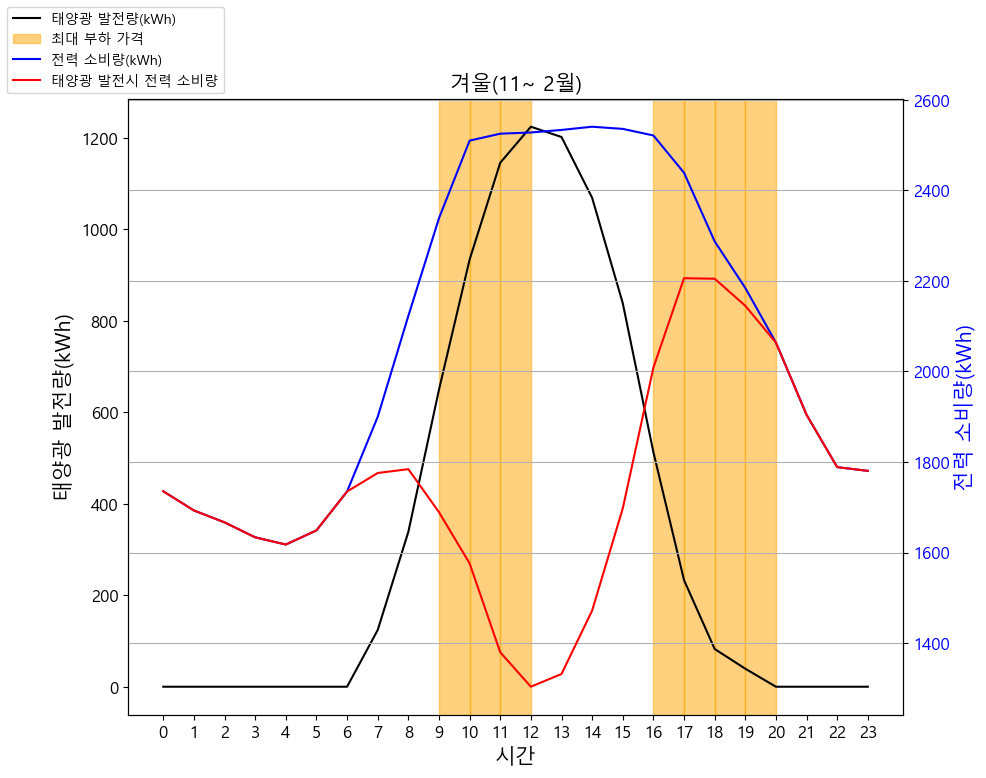

In [22]:
fig, ax1 = plt.subplots(figsize=(10, 8))

ax1.set_xlabel('시간', fontsize=15)
ax1.set_ylabel('태양광 발전량(kWh)', color='k', fontsize=15)
ax1.plot(ee, color='k', label='태양광 발전량(kWh)')
ax1.tick_params(axis='y', labelcolor='k', labelsize=12)
ax1.set_xticks(np.arange(0, 24, 1))
ax1.set_xticklabels(np.arange(0, 24, 1), fontsize=12)
ax1.set_title('겨울(11~ 2월)', fontsize=15)

ax2 = ax1.twinx()

ax2.set_ylabel('전력 소비량(kWh)', color='b', fontsize=15)
ax2.plot(qq, color='b', label='전력 소비량(kWh)')
ax2.tick_params(axis='y', labelcolor='b', labelsize=12)

plt.plot(qq-ee, color='r', label='태양광 발전시 전력 소비량')

for i in time2:
    if i == time2[-1]:
        ax1.axvspan(i, i+1, alpha=0.5, color='orange', label='최대 부하 가격')
    else:
        ax1.axvspan(i, i+1, alpha=0.5, color='orange')


fig.legend(loc='upper left')
plt.grid(True)
plt.show()


In [23]:
sell = {
    '시간' : ['경부하', '중간부하', '최대부하'],
    '여름철' : ['84.8', '137.7', '219.8'],
    '봄 가을철' : ['84.8','107.3','138.0'],
    '겨울철' : ['91.8', '137.9', '195.4']
}

In [24]:
sell = pd.DataFrame(sell)

In [25]:
sell

,시간,여름철,봄 가을철,겨울철
0,경부하,84.8,84.8,91.8
1,중간부하,137.7,107.3,137.9
2,최대부하,219.8,138.0,195.4


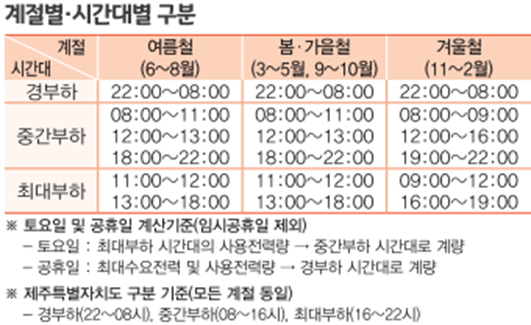

In [26]:
summer_price = [84.8, 84.8, 84.8, 84.8, 84.8,
                84.8, 84.8, 84.8, 137.7, 137.7,
                137.7, 219.8, 137.7, 219.8, 219.8,
                219.8, 219.8, 219.8, 219.8, 137.7,
                137.7, 137.7, 84.8, 84.8]

In [27]:
normal_price = [84.8, 84.8, 84.8, 84.8, 84.8,
                84.8, 84.8, 84.8, 107.3, 107.3,
                107.3, 138, 107.3, 138, 138,
                138, 138, 138, 138, 107.3,
                107.3, 107.3, 84.8, 84.8]

In [28]:
winter_price = [91.8, 91.8, 91.8, 91.8, 91.8, 
                91.8, 91.8, 91.8, 137.9, 195.4,
                195.4, 195.4, 137.9, 137.9, 137.9,
                137.9, 195.4, 195.4, 195.4, 195.4,
                137.9, 137.9, 91.8, 91.8]

In [29]:
np.dot(winter_price, (qq-ee))

5742228.589568261

In [30]:
np.dot(winter_price, qq)

7101001.773278682

In [31]:
np.dot(winter_price, qq) - np.dot(winter_price, (qq - ee))

1358773.1837104205

---
# 최적화 - 겨울

In [34]:
import pulp

In [35]:
# 시간당 전력 생산량
production = ee

# 시간당 전력 사용량
consumption = qq
# 시간당 전력 가격
price = winter_price
# 모델 생성
model = pulp.LpProblem("Power Cost Minimization", pulp.LpMinimize)

# 변수 생성
use = [pulp.LpVariable("use{}".format(i), 0) for i in range(24)]
generated_use = [pulp.LpVariable("gen_use{}".format(i), 0) for i in range(24)]

# 목적함수 생성
total_cost = pulp.lpSum([(consumption[i] - generated_use[i]) * price[i] for i in range(24)])
model += total_cost

# 제약조건 생성
for i in range(24):
    model += generated_use[i] <= production[i]
    if i > 0:
        model += generated_use[i] <= pulp.lpSum([generated_use[j] for j in range(i)])
    model += generated_use[i] <= use[i]
    model += generated_use[i] >= pulp.lpSum([generated_use[j] for j in range(i)])
    model += use[i] >= generated_use[i]
    model += use[i] <= consumption[i]
    
model += pulp.lpSum(generated_use) == pulp.lpSum(consumption)
    
# 문제 풀이
model.solve()

# 결과 출력
for i in range(24):
    print("시간 {}: 생산량 = {:.2f}, 소비량 = {:.2f}, 사용량 = {:.2f}, 발전된 전력 사용량 = {:.2f}".format(i, production[i], consumption[i], use[i].value(), generated_use[i].value()))

print("전체 요금: {:.2f}".format(pulp.value(model.objective)))


시간 0: 생산량 = 0.00, 소비량 = 1735.23, 사용량 = 0.00, 발전된 전력 사용량 = 0.00
시간 1: 생산량 = 0.00, 소비량 = 1692.90, 사용량 = 0.00, 발전된 전력 사용량 = 0.00
시간 2: 생산량 = 0.00, 소비량 = 1666.61, 사용량 = 0.00, 발전된 전력 사용량 = 0.00
시간 3: 생산량 = 0.00, 소비량 = 1633.57, 사용량 = 0.00, 발전된 전력 사용량 = 0.00
시간 4: 생산량 = 0.00, 소비량 = 1617.61, 사용량 = 0.00, 발전된 전력 사용량 = 0.00
시간 5: 생산량 = 0.00, 소비량 = 1648.87, 사용량 = 0.00, 발전된 전력 사용량 = 0.00
시간 6: 생산량 = 0.00, 소비량 = 1734.80, 사용량 = 0.00, 발전된 전력 사용량 = 0.00
시간 7: 생산량 = 124.03, 소비량 = 1899.73, 사용량 = 0.00, 발전된 전력 사용량 = 0.00
시간 8: 생산량 = 338.65, 소비량 = 2122.85, 사용량 = 0.00, 발전된 전력 사용량 = 0.00
시간 9: 생산량 = 649.47, 소비량 = 2338.62, 사용량 = 0.00, 발전된 전력 사용량 = 0.00
시간 10: 생산량 = 934.12, 소비량 = 2510.15, 사용량 = 0.00, 발전된 전력 사용량 = 0.00
시간 11: 생산량 = 1145.87, 소비량 = 2525.47, 사용량 = 0.00, 발전된 전력 사용량 = 0.00
시간 12: 생산량 = 1224.68, 소비량 = 2528.12, 사용량 = 0.00, 발전된 전력 사용량 = 0.00
시간 13: 생산량 = 1202.18, 소비량 = 2533.75, 사용량 = 0.00, 발전된 전력 사용량 = 0.00
시간 14: 생산량 = 1069.22, 소비량 = 2540.87, 사용량 = 0.00, 발전된 전력 사용량 = 0.00
시간 15: 생산량 = 838.69, 소비량 = 253

In [38]:
import pyswarms as ps

In [39]:
power_generation = ee # 시간당 태양광 발전량 리스트
power_usage = qq # 시간당 공장에서 전력을 사용하는 양 리스트
power_price = winter_price # 시간당 전력 가격 리스트

def minimize_cost(x):
    n_particles = x.shape[0]
    costs = np.zeros(n_particles)

    for i in range(n_particles):
        total_cost = 0
        accumulated_gen = 0

        for hour in range(24):
            gen_hour = power_generation[hour]
            usage_hour = power_usage[hour]
            price_hour = power_price[hour]

            accumulated_gen += gen_hour
            gen_used = min(accumulated_gen, usage_hour, x[i, hour])
            accumulated_gen -= gen_used

            total_cost += (usage_hour - gen_used) * price_hour

        costs[i] = total_cost

    return costs


# PSO 알고리즘 설정
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
bounds = (np.zeros(24), np.array(power_usage))
optimizer = ps.single.GlobalBestPSO(n_particles=50, dimensions=24, options=options, bounds=bounds)

# 최적화 실행
cost, pos = optimizer.optimize(minimize_cost, iters=1000)

2023-05-26 14:51:20,221 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=5.5e+6
2023-05-26 14:51:37,357 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 5501209.826972614, best pos: [ 265.48212935  175.473105   1505.78347651  112.50819111 1303.00791814
  724.19377028  541.10168205  997.13951834  187.32161858  885.87604122
 1884.49261517 1499.86303757    2.19060458   15.2156369   187.30532896
   89.76392269 1735.64842549 1103.41643161  923.78158206 1854.92157543
 1093.48466818 1815.26376407 1227.11038164 1388.0552546 ]


In [40]:
# 변수와 데이터 정의
power_generation = ee # 시간당 태양광 발전량 리스트
power_usage = qq # 시간당 공장에서 전력을 사용하는 양 리스트
power_price = winter_price # 시간당 전력 가격 리스트

# 목적 함수 정의
def minimize_cost(x):
    n_particles = x.shape[0]
    costs = np.zeros(n_particles)

    for i in range(n_particles):
        total_cost = 0
        accumulated_gen = 0

        for hour in range(24):
            gen_hour = power_generation[hour]
            usage_hour = power_usage[hour]
            price_hour = power_price[hour]

            accumulated_gen += gen_hour
            gen_used = min(accumulated_gen, usage_hour, x[i, hour])
            accumulated_gen -= gen_used

            total_cost += (usage_hour - gen_used) * price_hour

        costs[i] = total_cost

    return costs

# PSO 알고리즘 설정
options = {'c1': 0.5, 'c2': 0.7, 'w': 1.5}
bounds = (np.zeros(24), np.array(power_usage))
optimizer = ps.single.GlobalBestPSO(n_particles=25, dimensions=24, options=options, bounds=bounds)

# 최적화 실행
cost, pos = optimizer.optimize(minimize_cost, iters=1000)

print(f"Minimum cost: {cost}")
print(f"Power usage schedule: {pos}")

# 시간당 발전된 전력 사용량 계산 및 출력
accumulated_gen = 0
hourly_gen_used = np.zeros(24)
for hour in range(24):
    gen_hour = power_generation[hour]
    usage_hour = power_usage[hour]
    accumulated_gen += gen_hour
    gen_used = min(accumulated_gen, usage_hour, pos[hour])
    accumulated_gen -= gen_used
    hourly_gen_used[hour] = gen_used

2023-05-26 14:51:44,043 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.7, 'w': 1.5}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=5.52e+6
2023-05-26 14:51:53,878 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 5521252.290565446, best pos: [ 785.19225992   63.81632502  538.03024853  285.16120405 1202.41041765
 1405.50413242   49.96608565 1451.76171733 1567.0147123    72.57605156
 1043.6638115  1744.50269326  155.90389852   20.19468778  251.21122664
   64.39809319  378.91293294 1859.70362288 2179.96111516  320.57817333
 1873.34364479  476.3144706   799.54063111  258.405291  ]


Minimum cost: 5521252.290565446
Power usage schedule: [ 785.19225992   63.81632502  538.03024853  285.16120405 1202.41041765
 1405.50413242   49.96608565 1451.76171733 1567.0147123    72.57605156
 1043.6638115  1744.50269326  155.90389852   20.19468778  251.21122664
   64.39809319  378.91293294 1859.70362288 2179.96111516  320.57817333
 1873.34364479  476.3144706   799.54063111  258.405291  ]


In [41]:
print(f"Minimum cost: {cost}")

print(f"Hourly generated power usage: {hourly_gen_used}")

print(f"Power usage schedule: {pos}")

Minimum cost: 5521252.290565446
Hourly generated power usage: [   0.            0.            0.            0.            0.
    0.            0.          124.03086265  338.65378978   72.57605156
 1043.6638115  1613.21890947  155.90389852   20.19468778  251.21122664
   64.39809319  378.91293294 1859.70362288 2179.96111516  292.37589863
    0.            0.            0.            0.        ]
Power usage schedule: [ 785.19225992   63.81632502  538.03024853  285.16120405 1202.41041765
 1405.50413242   49.96608565 1451.76171733 1567.0147123    72.57605156
 1043.6638115  1744.50269326  155.90389852   20.19468778  251.21122664
   64.39809319  378.91293294 1859.70362288 2179.96111516  320.57817333
 1873.34364479  476.3144706   799.54063111  258.405291  ]


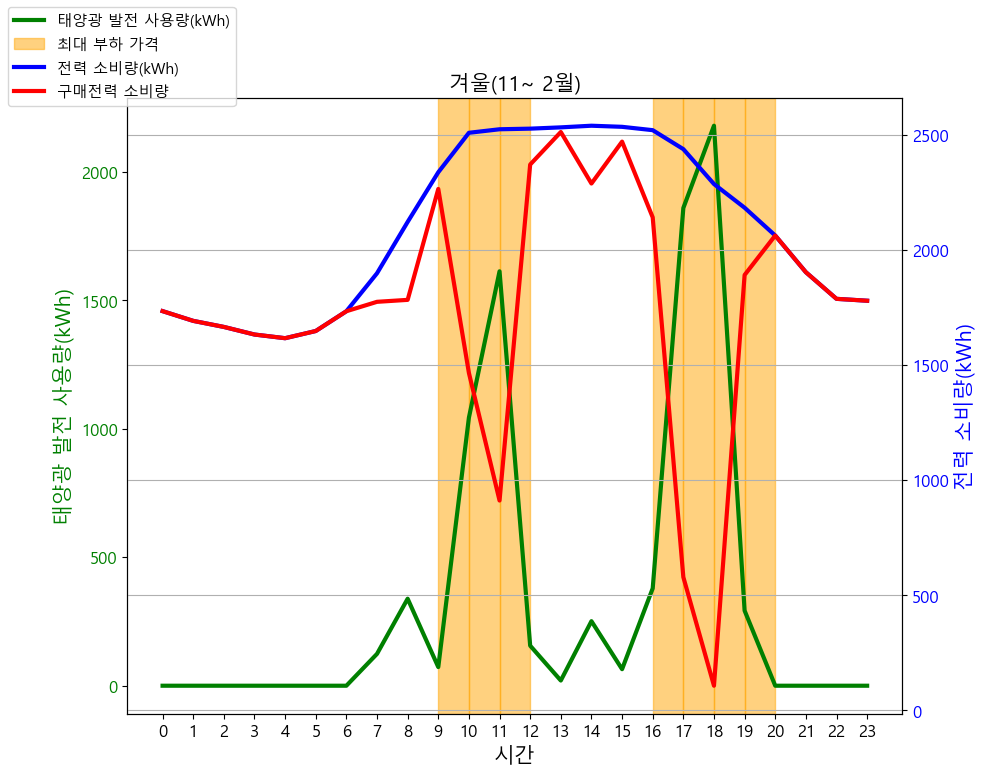

In [42]:
fig, ax1 = plt.subplots(figsize=(10, 8))

ax1.set_xlabel('시간', fontsize=15)
ax1.set_ylabel('태양광 발전 사용량(kWh)', color='green', fontsize=15)
ax1.plot(hourly_gen_used, color='green', label='태양광 발전 사용량(kWh)', linewidth = 3)
ax1.tick_params(axis='y', labelcolor='green', labelsize=12)
ax1.set_xticks(np.arange(0, 24, 1))
ax1.set_xticklabels(np.arange(0, 24, 1), fontsize=12)
ax1.set_title('겨울(11~ 2월)', fontsize=15)

ax2 = ax1.twinx()

ax2.set_ylabel('전력 소비량(kWh)', color='b', fontsize=15)
ax2.plot(qq, color='b', label='전력 소비량(kWh)', linewidth = 3)
ax2.tick_params(axis='y', labelcolor='b', labelsize=12)

plt.plot(qq-hourly_gen_used, color='r', label='구매전력 소비량', linewidth = 3)

for i in time2:
    if i == time2[-1]:
        ax1.axvspan(i, i+1, alpha=0.5, color='orange', label='최대 부하 가격')
    else:
        ax1.axvspan(i, i+1, alpha=0.5, color='orange')
    

fig.legend(loc='upper left',  fontsize = 11)
plt.grid(True)
plt.show()


In [45]:
import random
from deap import base, creator, tools, algorithms

In [46]:
# 변수와 데이터 정의
power_generation = ee # 시간당 태양광 발전량 리스트
power_usage = qq # 시간당 공장에서 전력을 사용하는 양 리스트
power_price = winter_price # 시간당 전력 가격 리스트

# 목적 함수 정의
def minimize_cost(individual):
    total_cost = 0
    accumulated_gen = 0

    for hour in range(24):
        gen_hour = power_generation[hour]
        usage_hour = power_usage[hour]
        price_hour = power_price[hour]

        accumulated_gen += gen_hour
        gen_used = min(accumulated_gen, usage_hour, individual[hour])
        accumulated_gen -= gen_used

        total_cost += (usage_hour - gen_used) * price_hour

    return total_cost,

# 유전 알고리즘 설정
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_float", random.random)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=24)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", minimize_cost)

# 최적화 실행
pop = toolbox.population(n=50)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("Avg", np.mean)
stats.register("Std", np.std)
stats.register("Min", np.min)
stats.register("Max", np.max)

pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=3000, stats=stats, halloffame=hof, verbose=True)

best_individual = hof[0]
best_cost = minimize_cost(best_individual)


gen	nevals	Avg        	Std   	Min        	Max        
0  	50    	7.09967e+06	180.23	7.09926e+06	7.10015e+06
1  	34    	7.09955e+06	139.393	7.09912e+06	7.09996e+06
2  	28    	7.09944e+06	144.248	7.09912e+06	7.10016e+06
3  	34    	7.09936e+06	170.784	7.09883e+06	7.09971e+06
4  	32    	7.09924e+06	198.878	7.09869e+06	7.09963e+06
5  	36    	7.09906e+06	190.707	7.0987e+06 	7.09946e+06
6  	27    	7.09893e+06	200.854	7.09842e+06	7.09955e+06
7  	25    	7.09877e+06	241.161	7.09825e+06	7.09972e+06
8  	33    	7.09857e+06	271.711	7.09793e+06	7.0992e+06 
9  	32    	7.0983e+06 	280.876	7.09732e+06	7.09903e+06
10 	28    	7.09808e+06	310.327	7.09732e+06	7.0986e+06 
11 	27    	7.09777e+06	333.385	7.09701e+06	7.09843e+06
12 	26    	7.09754e+06	278.147	7.09705e+06	7.09845e+06
13 	25    	7.09728e+06	162.681	7.09706e+06	7.09776e+06
14 	29    	7.09713e+06	121.861	7.0968e+06 	7.09747e+06
15 	26    	7.09704e+06	135.837	7.09647e+06	7.09722e+06
16 	37    	7.09694e+06	203.519	7.09645e+06	7.09733e+06
17 	34    	7

In [47]:
print(f"Minimum cost: {best_cost[0]}")
print(f"Power usage schedule: {best_individual}")

Minimum cost: 6524748.58138574
Power usage schedule: [11.82738106977388, 11.559645048492241, 1.1235402200745144, -8.735708111324609, 8.006110198814683, -2.78833141623583, 6.510487966823575, 124.68157693818736, 187.1613013391979, 263.0513462928678, 274.15022819106554, 259.10151743708093, 194.78326854683593, 170.65756146737027, 188.05159919148568, 150.55548643713547, 265.06762892032185, 279.5419270142252, 244.85036253463784, 261.15936404972445, 202.06352579692978, 209.24277551287153, 128.4338174280031, 136.94348936920804]


In [48]:
from scipy.optimize import linprog

In [49]:
power_generation = ee # 시간당 태양광 발전량 리스트
power_usage = qq # 시간당 공장에서 전력을 사용하는 양 리스트
power_price = winter_price # 시간당 전력 가격 리스트

# 목적 함수 계수 정의
c = np.hstack((power_price, np.zeros(24)))

# 제약 조건 정의
A_eq = []
b_eq = []

# 발전된 전력 사용량은 현재 시간까지 발전된 양만 사용할 수 있음
for i in range(24):
    A_eq.append([0] * i + [1] * (24 - i) + [-1 if j == i else 0 for j in range(24)])
    b_eq.append(power_generation[i])

# 하루에 발전된 전력은 모두 사용해야 함
A_eq.append([0]*24 + [-1]*24)
b_eq.append(-sum(power_generation))

# 전력 사용량과 전력 발전량, 전력 가격은 고정이지만, 발전된 전력 사용량은 어느 시간에 사용할지는 정할 수 있음
bounds = [(0, usage) for usage in power_usage] + [(0, None) for _ in range(24)]

# 선형 계획법 실행
res = linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='highs')

# 결과 출력
if res.success:
    minimum_cost = res.fun
    power_usage_schedule = res.x[:24]

    print(f"Minimum cost: {minimum_cost}")
    print(f"Power usage schedule: {power_usage_schedule}")
else:
    print("Optimization failed. Please check the constraints and data.")


Optimization failed. Please check the constraints and data.


---
# 최적화 - 봄, 가을

In [50]:
np.dot(normal_price, qq-ee)

4482914.645611405

In [51]:
# 변수와 데이터 정의
power_generation_normal = ee # 시간당 태양광 발전량 리스트
power_usage_normal = qq # 시간당 공장에서 전력을 사용하는 양 리스트
power_price_normal = normal_price # 시간당 전력 가격 리스트

# PSO 알고리즘 설정
options_normal = {'c1': 0.7, 'c2': 0.3, 'w': 1.5}
bounds_normal = (np.zeros(24), np.array(power_usage_normal))
optimizer_normal = ps.single.GlobalBestPSO(n_particles=25, dimensions=24, options=options_normal, bounds=bounds_normal)

def minimize_cost_normal(x):
    n_particles_normal = x.shape[0]
    costs_normal = np.zeros(n_particles_normal)

    for i in range(n_particles_normal):
        total_cost_normal = 0
        accumulated_gen_normal = 0

        for hour in range(24):
            gen_hour_normal = power_generation_normal[hour]
            usage_hour_normal = power_usage_normal[hour]
            price_hour_normal = power_price_normal[hour]

            accumulated_gen_normal += gen_hour_normal
            gen_used_normal = min(accumulated_gen_normal, usage_hour_normal, x[i, hour])
            accumulated_gen_normal -= gen_used_normal

            total_cost_normal += (usage_hour_normal - gen_used_normal) * price_hour_normal

        costs_normal[i] = total_cost_normal

    return costs_normal

# 최적화 실행
cost_normal, pos_normal = optimizer_normal.optimize(minimize_cost_normal, iters=2000)

# 시간당 발전된 전력 사용량 계산 및 출력
accumulated_gen_normal = 0
hourly_gen_used_normal = np.zeros(24)
for hour in range(24):
    gen_hour_normal = power_generation_normal[hour]
    usage_hour_normal = power_usage_normal[hour]
    accumulated_gen_normal += gen_hour_normal
    gen_used_normal = min(accumulated_gen_normal, usage_hour_normal, pos_normal[hour])
    accumulated_gen_normal -= gen_used_normal
    hourly_gen_used_normal[hour] = gen_used_normal

2023-05-26 14:53:32,963 - pyswarms.single.global_best - INFO - Optimize for 2000 iters with {'c1': 0.7, 'c2': 0.3, 'w': 1.5}
pyswarms.single.global_best: 100%|██████████|2000/2000, best_cost=4.4e+6
2023-05-26 14:53:52,040 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 4401363.054252139, best pos: [1.33315707e+03 1.24535887e+03 8.72898945e+02 1.52468878e+02
 1.58785748e+03 6.89754110e+02 3.47027556e+02 1.55475679e+03
 7.83536010e+02 1.12271667e+00 7.48015463e+01 1.10193888e+03
 7.59411177e+01 7.19981168e+02 2.49780994e+03 1.62257369e+03
 1.32340974e+03 2.33295662e+03 1.89059458e+03 8.03758130e+02
 1.66665396e+03 9.18077591e+02 4.72562776e+02 1.69159904e+03]


In [53]:
print(f"Minimum cost: {cost_normal}")

print(f"Hourly generated power usage: {hourly_gen_used_normal}")

print(f"Power usage schedule: {pos_normal}")

Minimum cost: 4401363.054252139
Hourly generated power usage: [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.24030863e+02
 3.38653790e+02 1.12271667e+00 7.48015463e+01 1.10193888e+03
 7.59411177e+01 7.19981168e+02 2.49780994e+03 1.62257369e+03
 1.32340974e+03 3.92649095e+02 8.25184225e+01 3.93739339e+01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
Power usage schedule: [1.33315707e+03 1.24535887e+03 8.72898945e+02 1.52468878e+02
 1.58785748e+03 6.89754110e+02 3.47027556e+02 1.55475679e+03
 7.83536010e+02 1.12271667e+00 7.48015463e+01 1.10193888e+03
 7.59411177e+01 7.19981168e+02 2.49780994e+03 1.62257369e+03
 1.32340974e+03 2.33295662e+03 1.89059458e+03 8.03758130e+02
 1.66665396e+03 9.18077591e+02 4.72562776e+02 1.69159904e+03]


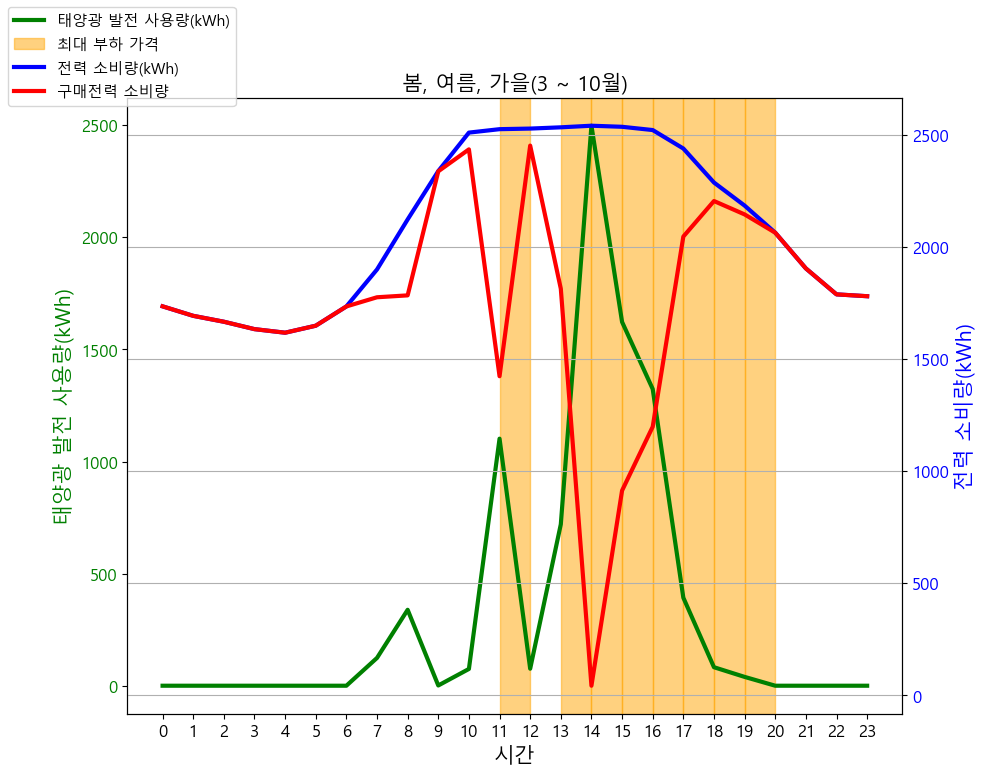

In [54]:
fig, ax1 = plt.subplots(figsize=(10, 8))

ax1.set_xlabel('시간', fontsize=15)
ax1.set_ylabel('태양광 발전 사용량(kWh)', color='g', fontsize=15)
ax1.plot(hourly_gen_used_normal, color='g', label='태양광 발전 사용량(kWh)', linewidth = 3)
ax1.tick_params(axis='y', labelcolor='g', labelsize=12)
ax1.set_xticks(np.arange(0, 24, 1))
ax1.set_xticklabels(np.arange(0, 24, 1), fontsize=12)
ax1.set_title('봄, 여름, 가을(3 ~ 10월)', fontsize=15)

ax2 = ax1.twinx()

ax2.set_ylabel('전력 소비량(kWh)', color='b', fontsize=15)
ax2.plot(qq, color='b', label='전력 소비량(kWh)', linewidth = 3)
ax2.tick_params(axis='y', labelcolor='b', labelsize=12)

plt.plot(qq-hourly_gen_used_normal, color='r', label='구매전력 소비량', linewidth = 3)

for i in time:
    if i == time[-1]:
        ax1.axvspan(i, i+1, alpha=0.5, color='orange', label='최대 부하 가격')
    else:
        ax1.axvspan(i, i+1, alpha=0.5, color='orange')
    

fig.legend(loc='upper left', fontsize = 11)
plt.grid(True)
plt.show()


pd.DataFrame([ee, qq, hourly_gen_used_normal, pos_normal, qq-hourly_gen_used_normal, np.array(winter_price), np.array(normal_price), np.array(summer_price)], 
             index=['실제 발전량','실제 전력 사용량','발전 사용량', '구매 사용량', '구매전력 소비량', '겨울 전력 가격', '봄 가을 전력 가격', '여름 전력 가격']).T.to_csv('total_info.csv', index=True, encoding='cp949')